In [33]:
# load_shapes.py

import glob, pandas as pd
from docx import Document
import re

# Ï≤´ Î≤àÏß∏ ÌÖåÏù¥Î∏îÎßå Î∂àÎü¨ÏôÄ Í∞ÑÎã®Ìûà Ï∂úÎ†•Ìï¥ Î¥ÖÎãàÎã§.
path = r"C:\Users\grace\OneDrive\Desktop\dataset\body_shape\ÎÇ®ÏÑ±_20ÎåÄ_ÏπòÏàò.docx"
doc = Document(path)
table = doc.tables[0]

# Ìëú ‚Üí DataFrame
data = [[cell.text.strip() for cell in row.cells] for row in table.rows]
df = pd.DataFrame(data[1:], columns=data[0])
print(df.head())


              Î≥ÄÏàò Î™Ö ÏûëÏùÄ\nÏó≠ÏÇºÍ∞ÅÏ≤¥Ìòï ÌÅ∞\nÏÇºÍ∞ÅÏ≤¥Ìòï  ÏÇ¨Í∞ÅÏ≤¥Ìòï
0  (101)Î®∏Î¶¨ÏúÑÎ°úÎªóÏùÄÏ£ºÎ®πÎÜíÏù¥      2041    2049  2047
1           (102)ÌÇ§      1729    1735  1732
2         (103)ÎààÎÜíÏù¥      1613    1620  1617
3        (104)Î™©Îí§ÎÜíÏù¥      1472    1479  1475
4        (105)Ïñ¥Íπ®ÎÜíÏù¥      1395    1403  1398


In [34]:
import glob
import pandas as pd
from docx import Document

def load_shape_tables_from_folder(folder_path):
    all_dfs = []
    # Ìè¥Îçî ÎÇ¥ .docx ÌååÏùº Î¶¨Ïä§Ìä∏
    for path in glob.glob(f"{folder_path}/*.docx"):
        # ÌååÏùºÎ™ÖÏóêÏÑú Î©îÌÉÄ(ÏÑ±Î≥Ñ¬∑Ïó∞Î†πÎåÄ¬∑Ï≤¥Ìòï) Ï∂îÏ∂ú (ÌïÑÏöîÏóê Îî∞Îùº Ïª§Ïä§ÌÑ∞ÎßàÏù¥Ïßï)
        fname = path.split("\\")[-1].rsplit(".",1)[0]
        gender, age_range, _ = fname.split("_", 2)
        
        # Î¨∏ÏÑú Î°úÎìú
        doc = Document(path)
        table = doc.tables[0]  # Ï≤´ Î≤àÏß∏ Ìëú Í∞ÄÏ†ï
        
        # Ìëú ‚Üí DataFrame
        data = [[cell.text.strip() for cell in row.cells] for row in table.rows]
        df = pd.DataFrame(data[1:], columns=data[0])
        
        # Î©îÌÉÄ Ïª¨Îüº Ï∂îÍ∞Ä
        df['gender']    = gender
        df['age_range'] = age_range
        
        all_dfs.append(df)
    
    # Î™®Îëê Ìï©ÏπòÍ∏∞
    combined = pd.concat(all_dfs, ignore_index=True, sort=False)
    return combined

# ÏÇ¨Ïö© Ïòà
folder = r"C:\Users\grace\OneDrive\Desktop\dataset\body_shape"
df_all = load_shape_tables_from_folder(folder)

# Í≤∞Í≥º ÌôïÏù∏
print(df_all.shape)
display(df_all.head())


(1190, 13)


Î≥ÄÏàò Î™Ö ÏûëÏùÄ\nÏó≠ÏÇºÍ∞ÅÏ≤¥Ìòï ÌÅ∞\nÏÇºÍ∞ÅÏ≤¥Ìòï  ÏÇ¨Í∞ÅÏ≤¥Ìòï gender age_range Ïó≠ÏÇºÍ∞ÅÏ≤¥Ìòï ÏûëÏùÄ\nÏÇ¨Í∞ÅÏ≤¥Ìòï  \
0  (101)Î®∏Î¶¨ÏúÑÎ°úÎªóÏùÄÏ£ºÎ®πÎÜíÏù¥      2041    2049  2047     ÎÇ®ÏÑ±       20ÎåÄ   NaN      NaN   
1           (102)ÌÇ§      1729    1735  1732     ÎÇ®ÏÑ±       20ÎåÄ   NaN      NaN   
2         (103)ÎààÎÜíÏù¥      1613    1620  1617     ÎÇ®ÏÑ±       20ÎåÄ   NaN      NaN   
3        (104)Î™©Îí§ÎÜíÏù¥      1472    1479  1475     ÎÇ®ÏÑ±       20ÎåÄ   NaN      NaN   
4        (105)Ïñ¥Íπ®ÎÜíÏù¥      1395    1403  1398     ÎÇ®ÏÑ±       20ÎåÄ   NaN      NaN   

  ÏÇºÍ∞ÅÏ≤¥Ìòï ÌÅ∞\nÏÇ¨Í∞ÅÏ≤¥Ìòï ÌÅ∞ Ïó≠ÏÇºÍ∞ÅÏ≤¥Ìòï ÏûëÏùÄÏÇ¨Í∞ÅÏ≤¥Ìòï(Í∏¥ÏßÄÏ≤¥) ÏûëÏùÄÏÇ¨Í∞ÅÏ≤¥Ìòï(ÏßßÏùÄÏßÄÏ≤¥)  
0  NaN     NaN     NaN         NaN          NaN  
1  NaN     NaN     NaN         NaN          NaN  
2  NaN     NaN     NaN         NaN          NaN  
3  NaN     NaN     NaN         NaN          NaN  
4  NaN     NaN     NaN         NaN          NaN

In [35]:
df_all.columns = (df_all.columns
      .str.replace(r"[\s\n]+", "_", regex=True)
      .str.strip("_")
      .str.lower()
)

In [36]:
df_all

Î≥ÄÏàò_Î™Ö ÏûëÏùÄ_Ïó≠ÏÇºÍ∞ÅÏ≤¥Ìòï ÌÅ∞_ÏÇºÍ∞ÅÏ≤¥Ìòï  ÏÇ¨Í∞ÅÏ≤¥Ìòï gender age_range Ïó≠ÏÇºÍ∞ÅÏ≤¥Ìòï ÏûëÏùÄ_ÏÇ¨Í∞ÅÏ≤¥Ìòï  \
0     (101)Î®∏Î¶¨ÏúÑÎ°úÎªóÏùÄÏ£ºÎ®πÎÜíÏù¥     2041   2049  2047     ÎÇ®ÏÑ±       20ÎåÄ   NaN     NaN   
1              (102)ÌÇ§     1729   1735  1732     ÎÇ®ÏÑ±       20ÎåÄ   NaN     NaN   
2            (103)ÎààÎÜíÏù¥     1613   1620  1617     ÎÇ®ÏÑ±       20ÎåÄ   NaN     NaN   
3           (104)Î™©Îí§ÎÜíÏù¥     1472   1479  1475     ÎÇ®ÏÑ±       20ÎåÄ   NaN     NaN   
4           (105)Ïñ¥Íπ®ÎÜíÏù¥     1395   1403  1398     ÎÇ®ÏÑ±       20ÎåÄ   NaN     NaN   
...               ...      ...    ...   ...    ...       ...   ...     ...   
1185     (416)ÎßâÎåÄÏ•îÏÜêÏïàÎëòÎ†à       87    NaN    83     Ïó¨ÏÑ±       60ÎåÄ   NaN     NaN   
1186         (417)ÏÜêÎëòÎ†à      190    NaN   191     Ïó¨ÏÑ±       60ÎåÄ   NaN     NaN   
1187         (418)Î∞úÎÑàÎπÑ       92    NaN    92     Ïó¨ÏÑ±       60ÎåÄ   NaN     NaN   
1188       (419)Î∞úÏßÅÏÑ†Í∏∏Ïù¥      226    NaN   227     Ïó¨ÏÑ±       60ÎåÄ   NaN     NaN   
1189      (420)Í∞ÄÏ™ΩÎ≥µÏÇ¨ÎÜíÏù¥       61    NaN    59     Ïó¨ÏÑ±       60ÎåÄ   NaN     NaN   

     ÏÇºÍ∞ÅÏ≤¥Ìòï ÌÅ∞_ÏÇ¨Í∞ÅÏ≤¥Ìòï ÌÅ∞_Ïó≠ÏÇºÍ∞ÅÏ≤¥Ìòï ÏûëÏùÄÏÇ¨Í∞ÅÏ≤¥Ìòï(Í∏¥ÏßÄÏ≤¥) ÏûëÏùÄÏÇ¨Í∞ÅÏ≤¥Ìòï(ÏßßÏùÄÏßÄÏ≤¥)  
0     NaN    NaN     NaN         NaN          NaN  
1     NaN    NaN     NaN         NaN          NaN  
2     NaN    NaN     NaN         NaN          NaN  
3     NaN    NaN     NaN         NaN          NaN  
4     NaN    NaN     NaN         NaN          NaN  
...   ...    ...     ...         ...          ...  
1185   82     85     NaN         NaN          NaN  
1186  191    192     NaN         NaN          NaN  
1187   93     92     NaN         NaN          NaN  
1188  227    228     NaN         NaN          NaN  
1189   60     60     NaN         NaN          NaN  

[1190 rows x 13 columns]

In [37]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Î≥ÄÏàò_Î™Ö          1190 non-null   object
 1   ÏûëÏùÄ_Ïó≠ÏÇºÍ∞ÅÏ≤¥Ìòï      714 non-null    object
 2   ÌÅ∞_ÏÇºÍ∞ÅÏ≤¥Ìòï        476 non-null    object
 3   ÏÇ¨Í∞ÅÏ≤¥Ìòï          714 non-null    object
 4   gender        1190 non-null   object
 5   age_range     1190 non-null   object
 6   Ïó≠ÏÇºÍ∞ÅÏ≤¥Ìòï         595 non-null    object
 7   ÏûëÏùÄ_ÏÇ¨Í∞ÅÏ≤¥Ìòï       476 non-null    object
 8   ÏÇºÍ∞ÅÏ≤¥Ìòï          714 non-null    object
 9   ÌÅ∞_ÏÇ¨Í∞ÅÏ≤¥Ìòï        476 non-null    object
 10  ÌÅ∞_Ïó≠ÏÇºÍ∞ÅÏ≤¥Ìòï       119 non-null    object
 11  ÏûëÏùÄÏÇ¨Í∞ÅÏ≤¥Ìòï(Í∏¥ÏßÄÏ≤¥)   119 non-null    object
 12  ÏûëÏùÄÏÇ¨Í∞ÅÏ≤¥Ìòï(ÏßßÏùÄÏßÄÏ≤¥)  119 non-null    object
dtypes: object(13)
memory usage: 121.0+ KB


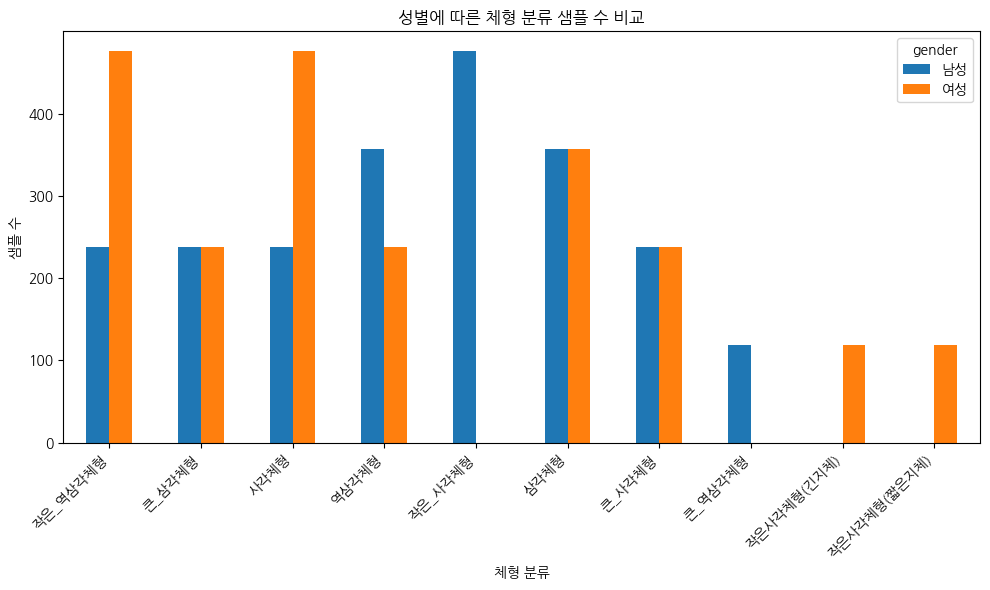

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_all is the DataFrame loaded previously
df = df_all.copy()

# List of shape columns
shape_cols = [
    "ÏûëÏùÄ_Ïó≠ÏÇºÍ∞ÅÏ≤¥Ìòï", "ÌÅ∞_ÏÇºÍ∞ÅÏ≤¥Ìòï", "ÏÇ¨Í∞ÅÏ≤¥Ìòï",
    "Ïó≠ÏÇºÍ∞ÅÏ≤¥Ìòï", "ÏûëÏùÄ_ÏÇ¨Í∞ÅÏ≤¥Ìòï", "ÏÇºÍ∞ÅÏ≤¥Ìòï",
    "ÌÅ∞_ÏÇ¨Í∞ÅÏ≤¥Ìòï", "ÌÅ∞_Ïó≠ÏÇºÍ∞ÅÏ≤¥Ìòï",
    "ÏûëÏùÄÏÇ¨Í∞ÅÏ≤¥Ìòï(Í∏¥ÏßÄÏ≤¥)", "ÏûëÏùÄÏÇ¨Í∞ÅÏ≤¥Ìòï(ÏßßÏùÄÏßÄÏ≤¥)"
]

# Count non-null entries for each shape by gender
counts = df.groupby("gender")[shape_cols].apply(lambda g: g.notna().sum())

# Transpose for plotting
counts = counts.T

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
counts.plot(kind='bar', ax=ax)
ax.set_xlabel("Ï≤¥Ìòï Î∂ÑÎ•ò")
ax.set_ylabel("ÏÉòÌîå Ïàò")
ax.set_title("ÏÑ±Î≥ÑÏóê Îî∞Î•∏ Ï≤¥Ìòï Î∂ÑÎ•ò ÏÉòÌîå Ïàò ÎπÑÍµê")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [39]:
# import glob
# files = glob.glob(r"C:\Users\grace\OneDrive\Desktop\dataset\body_shape\*.docx")
# print(files)


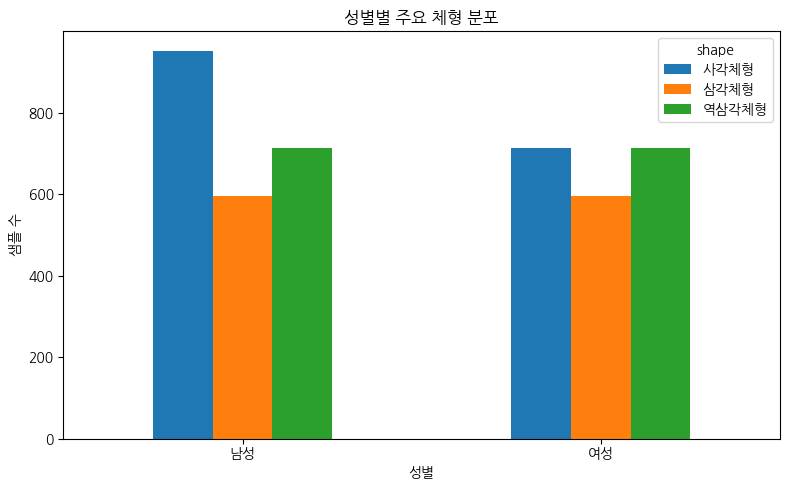

In [40]:
# 2) Îß§Ìïë Ï†ïÏùò
mapping = {
    "ÏûëÏùÄ_Ïó≠ÏÇºÍ∞ÅÏ≤¥Ìòï": "Ïó≠ÏÇºÍ∞ÅÏ≤¥Ìòï",
    "Ïó≠ÏÇºÍ∞ÅÏ≤¥Ìòï":     "Ïó≠ÏÇºÍ∞ÅÏ≤¥Ìòï",
    "ÌÅ∞_Ïó≠ÏÇºÍ∞ÅÏ≤¥Ìòï":   "Ïó≠ÏÇºÍ∞ÅÏ≤¥Ìòï",
    "ÏûëÏùÄ_ÏÇ¨Í∞ÅÏ≤¥Ìòï":   "ÏÇ¨Í∞ÅÏ≤¥Ìòï",
    "ÏÇ¨Í∞ÅÏ≤¥Ìòï":       "ÏÇ¨Í∞ÅÏ≤¥Ìòï",
    "ÌÅ∞_ÏÇ¨Í∞ÅÏ≤¥Ìòï":     "ÏÇ¨Í∞ÅÏ≤¥Ìòï",
    "ÏûëÏùÄ_ÏÇ¨Í∞ÅÏ≤¥Ìòï(Í∏¥ÏßÄÏ≤¥)": "ÏÇ¨Í∞ÅÏ≤¥Ìòï",
    "ÏûëÏùÄ_ÏÇ¨Í∞ÅÏ≤¥Ìòï(ÏßßÏùÄÏßÄÏ≤¥)": "ÏÇ¨Í∞ÅÏ≤¥Ìòï",
    "ÏûëÏùÄ_ÏÇºÍ∞ÅÏ≤¥Ìòï":   "ÏÇºÍ∞ÅÏ≤¥Ìòï",
    "ÏÇºÍ∞ÅÏ≤¥Ìòï":       "ÏÇºÍ∞ÅÏ≤¥Ìòï",
    "ÌÅ∞_ÏÇºÍ∞ÅÏ≤¥Ìòï":     "ÏÇºÍ∞ÅÏ≤¥Ìòï"
}

# 3) Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî Ïª¨ÎüºÎßå ÏÑ†ÌÉù
available_cols = [col for col in mapping.keys() if col in df_all.columns]

# 4) melt Î∞è ÌïÑÌÑ∞ÎßÅ
df_long = df_all.melt(
    id_vars=["gender"], value_vars=available_cols,
    var_name="detail_shape", value_name="measurement"
).dropna(subset=["measurement"])

# 5) Í∞ÑÎûµ Ï≤¥ÌòïÏúºÎ°ú Îß§Ìïë
df_long["shape"] = df_long["detail_shape"].map(mapping)

# 6) ÏßëÍ≥Ñ
count_df = df_long.groupby(["gender","shape"])["measurement"].count().unstack(fill_value=0)

# 7) ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(figsize=(8,5))
count_df.plot(kind='bar', ax=ax)
ax.set_title("ÏÑ±Î≥ÑÎ≥Ñ Ï£ºÏöî Ï≤¥Ìòï Î∂ÑÌè¨")
ax.set_xlabel("ÏÑ±Î≥Ñ")
ax.set_ylabel("ÏÉòÌîå Ïàò")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [41]:
import pandas as pd
import glob
from docx import Document
# 2) ÏÉÅÏÑ∏ Ï≤¥Ìòï Ïª¨Îüº Î¶¨Ïä§Ìä∏
shape_cols = [c for c in df.columns 
              if c not in ('Î≥ÄÏàò_Î™Ö','gender','age_range')]

# 3) melt ÌõÑ ‚ÄúÏûàÏùå=1‚Äù ÌîåÎûòÍ∑∏
long = df.melt(
    id_vars=['gender','age_range'], 
    value_vars=shape_cols,
    var_name='detail_shape', 
    value_name='val'
).dropna(subset=['val'])

long['flag'] = 1

# 4) Í∞ÑÎûµ Ï≤¥Ìòï Îß§Ìïë (ÌïÑÏöîÌïú Í≤ÉÎßå)
mapping = {
    "ÏûëÏùÄ_Ïó≠ÏÇºÍ∞ÅÏ≤¥Ìòï": "Ïó≠ÏÇºÍ∞ÅÏ≤¥Ìòï", "Ïó≠ÏÇºÍ∞ÅÏ≤¥Ìòï": "Ïó≠ÏÇºÍ∞ÅÏ≤¥Ìòï", "ÌÅ∞_Ïó≠ÏÇºÍ∞ÅÏ≤¥Ìòï": "Ïó≠ÏÇºÍ∞ÅÏ≤¥Ìòï",
    "ÏûëÏùÄ_ÏÇºÍ∞ÅÏ≤¥Ìòï": "ÏÇºÍ∞ÅÏ≤¥Ìòï",   "ÏÇºÍ∞ÅÏ≤¥Ìòï":     "ÏÇºÍ∞ÅÏ≤¥Ìòï",   "ÌÅ∞_ÏÇºÍ∞ÅÏ≤¥Ìòï":    "ÏÇºÍ∞ÅÏ≤¥Ìòï",
    "ÏûëÏùÄ_ÏÇ¨Í∞ÅÏ≤¥Ìòï": "ÏÇ¨Í∞ÅÏ≤¥Ìòï", "ÏÇ¨Í∞ÅÏ≤¥Ìòï":     "ÏÇ¨Í∞ÅÏ≤¥Ìòï",   "ÌÅ∞_ÏÇ¨Í∞ÅÏ≤¥Ìòï":    "ÏÇ¨Í∞ÅÏ≤¥Ìòï"
}
long['shape'] = long['detail_shape'].map(mapping)

# 5) ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ±
pivot = (
    long
    .pivot_table(
        index=['gender','age_range'], 
        columns='shape', 
        values='flag',
        aggfunc='sum',
        fill_value=0
    )
    .reset_index()
)

print(pivot)


shape gender age_range  ÏÇ¨Í∞ÅÏ≤¥Ìòï  ÏÇºÍ∞ÅÏ≤¥Ìòï  Ïó≠ÏÇºÍ∞ÅÏ≤¥Ìòï
0         ÎÇ®ÏÑ±       20ÎåÄ   119   119    119
1         ÎÇ®ÏÑ±       30ÎåÄ   119   119    238
2         ÎÇ®ÏÑ±       40ÎåÄ   238   119    119
3         ÎÇ®ÏÑ±       50ÎåÄ   357   119      0
4         ÎÇ®ÏÑ±       60ÎåÄ   119   119    238
5         Ïó¨ÏÑ±       20ÎåÄ   119   119    238
6         Ïó¨ÏÑ±       30ÎåÄ   119   119      0
7         Ïó¨ÏÑ±       40ÎåÄ   119   119    238
8         Ïó¨ÏÑ±       50ÎåÄ   119   119    119
9         Ïó¨ÏÑ±       60ÎåÄ   238   119    119


In [42]:
# 1) melt(long) Ìè¨Îß∑Ïóê ‚ÄòÎ≥ÄÏàò_Î™Ö‚ÄôÍπåÏßÄ Ìè¨Ìï®Ìï¥ÏÑú
long2 = df.melt(
    id_vars=['gender','age_range','Î≥ÄÏàò_Î™Ö'],
    value_vars=shape_cols,
    var_name='detail_shape',
    value_name='val'
).dropna(subset=['val'])

# 2) flag=1 Î°ú ÌëúÏãú
long2['flag'] = 1

# 3) detail_shape ‚Üí Í∞ÑÎûµÏ≤¥Ìòï Îß§Ìïë
long2['shape'] = long2['detail_shape'].map(mapping)

# 4) Î≥ÄÏàò_Î™ÖÎ≥Ñ Ï≤¥ÌòïÎ≥Ñ Îì±Ïû• ÌöüÏàò pivot
pivot_vars = long2.pivot_table(
    index='Î≥ÄÏàò_Î™Ö',
    columns='shape',
    values='flag',
    aggfunc='sum',
    fill_value=0
)

# 5) Ï¥ùÌï© Ïó¥ Ï∂îÍ∞Ä(Ïñ¥Îñ§ Î≥ÄÏàòÎì§Ïù¥ Í∞ÄÏû• ÎßéÏù¥ Ï≤¥Ìòï Íµ¨Î∂ÑÏóê Ïì∞ÏòÄÎäîÏßÄ)
pivot_vars['total'] = pivot_vars.sum(axis=1)

# 6) ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
pivot_vars = pivot_vars.sort_values('total', ascending=False)

print(pivot_vars.head(20))  # ÏÉÅÏúÑ 20Í∞ú Î≥ÄÏàò_Î™Ö ÌôïÏù∏


shape             ÏÇ¨Í∞ÅÏ≤¥Ìòï  ÏÇºÍ∞ÅÏ≤¥Ìòï  Ïó≠ÏÇºÍ∞ÅÏ≤¥Ìòï  total
Î≥ÄÏàò_Î™Ö                                      
(101)Î®∏Î¶¨ÏúÑÎ°úÎªóÏùÄÏ£ºÎ®πÎÜíÏù¥     14    10     12     36
(244)Îã§Î¶¨Í∞ÄÏ™ΩÍ∏∏Ïù¥         14    10     12     36
(309)ÏïâÏùÄÏóâÎç©Ïù¥Î¨¥Î¶éÏàòÌèâÍ∏∏Ïù¥    14    10     12     36
(308)ÏïâÏùÄÏò§Í∏àÎÜíÏù¥         14    10     12     36
(307)ÏïâÏùÄÎ¨¥Î¶éÎÜíÏù¥         14    10     12     36
(306)ÏïâÏùÄÎÑôÎã§Î¶¨ÎÜíÏù¥        14    10     12     36
(305)ÏïâÏùÄÌåîÍøàÏπòÎÜíÏù¥        14    10     12     36
(304)ÏïâÏùÄÏñ¥Íπ®ÎÜíÏù¥         14    10     12     36
(303)ÏïâÏùÄÎ™©Îí§ÎÜíÏù¥         14    10     12     36
(302)ÏïâÏùÄÎààÎÜíÏù¥          14    10     12     36
(301)ÏïâÏùÄÌÇ§            14    10     12     36
(247)Î∞∞ÍºΩÏàòÏ§ÄÏÉÖÏïûÎí§Í∏∏Ïù¥      14    10     12     36
(246)ÏÉÖÏïûÎí§Í∏∏Ïù¥          14    10     12     36
(245)Î™∏ÌÜµÏÑ∏Î°úÎëòÎ†à         14    10     12     36
(243)ÏóâÎç©Ïù¥ÏòÜÍ∏∏Ïù¥         14    10     12     36
(311)ÏïâÏùÄÏóâÎç©Ïù¥Î∞∞ÎëêÍªò       14 

In [47]:
unique_vars = df.iloc[:, 0].unique()
print(len(unique_vars), "Í∞úÏùò Í≥†Ïú† Î≥ÄÏàòÎ™Ö:")
for var in unique_vars:
    print(var)

119 Í∞úÏùò Í≥†Ïú† Î≥ÄÏàòÎ™Ö:
(101)Î®∏Î¶¨ÏúÑÎ°úÎªóÏùÄÏ£ºÎ®πÎÜíÏù¥
(102)ÌÇ§
(103)ÎààÎÜíÏù¥
(104)Î™©Îí§ÎÜíÏù¥
(105)Ïñ¥Íπ®ÎÜíÏù¥
(106)Ïñ¥Íπ®Í∞ÄÏ™ΩÎÜíÏù¥
(107)Í≤®ÎìúÎûëÎÜíÏù¥
(108)ÍµΩÌûåÌåîÍøàÏπòÎÜíÏù¥
(109)ÏóâÎç©Ïù¥ÎÜíÏù¥
(110)ÏÉÖÎÜíÏù¥
(111)Ï£ºÎ®πÎÜíÏù¥
(112)ÌóàÎ¶¨ÎÜíÏù¥
(113)Î∞∞ÍºΩÏàòÏ§ÄÌóàÎ¶¨ÎÜíÏù¥
(114)ÏúÑÏïûÏóâÎç©ÎºàÍ∞ÄÏãúÎÜíÏù¥
(115)Î¨¥Î¶éÎÜíÏù¥
(116)Í∞ÄÏä¥ÎÑàÎπÑ
(117)Ï†ñÍ∞ÄÏä¥ÎÑàÎπÑ
(118)ÌóàÎ¶¨ÎÑàÎπÑ
(119)Î∞∞ÍºΩÏàòÏ§ÄÌóàÎ¶¨ÎÑàÎπÑ
(120)ÏóâÎç©Ïù¥ÎÑàÎπÑ
(121)Í≤®ÎìúÎûëÎëêÍªò
(122)Í∞ÄÏä¥ÎëêÍªò
(123)Ï†ñÍ∞ÄÏä¥ÎëêÍªò
(124)ÌóàÎ¶¨ÎëêÍªò
(125)Î∞∞ÍºΩÏàòÏ§ÄÌóàÎ¶¨ÎëêÍªò
(126)ÏóâÎç©Ïù¥ÎëêÍªò
(127)ÏóâÎç©Ïù¥ÏàòÏßÅÍ∏∏Ïù¥
(128)Î™∏ÌÜµÏàòÏßÅÍ∏∏Ïù¥
(129)Î≤ΩÎ©¥ÏïûÏúºÎ°úÎªóÏùÄÏ£ºÎ®πÏàòÌèâÍ∏∏Ïù¥
(130)Î≤ΩÎ©¥Î™∏ÌÜµÎëêÍªò
(131)Î≤ΩÎ©¥Ïñ¥Íπ®ÏàòÌèâÍ∏∏Ïù¥
(132)Î™∏Î¨¥Í≤å
(201)ÏïûÏ§ëÏã¨Í∏∏Ïù¥
(202)Î∞∞ÍºΩÏàòÏ§ÄÏïûÏ§ëÏã¨Í∏∏Ïù¥
(203)Í≤®ÎìúÎûëÏïûÎ≤ΩÏÇ¨Ïù¥Í∏∏Ïù¥
(204)Í≤®ÎìúÎûëÏïûÏ†ëÌûòÏÇ¨Ïù¥Í∏∏Ïù¥
(205)Ï†ñÍº≠ÏßÄÏÇ¨Ïù¥ÏàòÌèâÍ∏∏Ïù¥(Ïó¨)
(206)Î™©ÎëòÎ†à
(207)Î™©Î∞ëÎëòÎ†à
(208)Í∞ÄÏä¥ÎëòÎ†à
(209)Ï†ñÍ∞ÄÏä¥ÎëòÎ†à
(210)Ï†ñÍ∞ÄÏä¥Ï

In [ ]:
import os, re, glob
import pandas as pd
from docx import Document
from typing import Dict, List, Tuple

BASE_DIR = r"C:\Users\grace\OneDrive\Desktop\dataset\body_shape"

VAR_MAP = {
    "(102)": "height",        # ÌÇ§
    "(128)": "torso_len",     # Î™∏ÌÜµÏàòÏßÅÍ∏∏Ïù¥
    "(317)": "shoulder",      # Ïñ¥Íπ®ÎÑàÎπÑ
}

SHAPE_KEYWORDS = ["Ïó≠ÏÇºÍ∞Å", "ÏÇºÍ∞Å", "ÏÇ¨Í∞Å"]  # Ïª¨Îüº ÏàúÏÑú Í≥†Ï†ïÏö©

def parse_file_meta(fname: str) -> Tuple[str, str]:
    sex_match = re.search(r"(ÎÇ®ÏÑ±|ÎÇ®Ïûê|Ïó¨ÏÑ±|Ïó¨Ïûê)", fname)
    age_match = re.search(r"(\d{2}ÎåÄ)", fname)
    sex = sex_match.group(1) if sex_match else "Unknown"
    age = age_match.group(1) if age_match else "Unknown"
    return sex, age

def parse_docx_table(path: str) -> pd.DataFrame:
    """
    Size KoreaÏö© docxÎäî ÎåÄÎ∂ÄÎ∂Ñ ‚ÄòÏ≤´ Î≤àÏß∏ Ìëú‚Äô ÏïàÏóê
    ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
    ‚îÇ Î≥ÄÏàò Î™Ö      ‚îÇ ÏûëÏùÄÏó≠ÏÇºÍ∞Å ‚îÇ ÌÅ∞ÏÇºÍ∞ÅÏ≤¥Ìòï ‚îÇ ÏÇ¨Í∞ÅÏ≤¥Ìòï ‚îÇ
    ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
    ‚îÇ (102)ÌÇ§      ‚îÇ 1729     ‚îÇ 1735     ‚îÇ 1732     ‚îÇ
    ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
    ÌòïÏãùÏúºÎ°ú Îì§Ïñ¥ ÏûàÏùå.
    ‚Üí Ìó§ÎçîÏóêÏÑú Ï≤¥Ìòï ÌÇ§ÏõåÎìú Ìè¨Ìï® Ïó¥Îßå ÎΩëÍ≥†, VAR_MAPÏóê ÏûàÎäî
      Î≥ÄÏàò ÏΩîÎìú ÌñâÎßå Í≥®Îùº DataFrameÏúºÎ°ú Î∞òÌôò.
    """
    doc = Document(path)
    if not doc.tables:
        return None
    table = doc.tables[0]

    # Ìëú Ï†ÑÏ≤¥Î•º 2Ï∞®Ïõê Î¶¨Ïä§Ìä∏Î°ú Ï∂îÏ∂ú
    rows = [[cell.text.strip() for cell in row.cells] for row in table.rows]
    if not rows or len(rows) < 2:
        return None

    header = rows[0]                 # Ï≤´ Ìñâ = Ìó§Îçî
    col_idx_map = {}                 # {shape: column_index}

    # Ìó§ÎçîÏóêÏÑú 'Ïó≠ÏÇºÍ∞Å', 'ÏÇºÍ∞Å', 'ÏÇ¨Í∞Å' ÌÇ§ÏõåÎìúÍ∞Ä Îì§Ïñ¥Í∞Ñ Ïó¥ Î≤àÌò∏ Ï∞æÍ∏∞
    for shape in SHAPE_KEYWORDS:
        for idx, h in enumerate(header):
            if shape in h:
                col_idx_map[shape] = idx
                break

    # ÌïµÏã¨ ÌÇ§ÏõåÎìú Ïó¥Ïù¥ ÌïòÎÇòÎùºÎèÑ ÏóÜÏúºÎ©¥ ÌååÏã± Ïã§Ìå®
    if len(col_idx_map) < len(SHAPE_KEYWORDS):
        return None

    records = []  # -> [[var, val1, val2, val3], ...]

    # ÎÇòÎ®∏ÏßÄ Ìñâ ÏàúÌöå
    for row in rows[1:]:
        first_cell = row[0].strip()
        code_match = re.match(r"^\(\d{3}\)", first_cell)   # '(102)...'
        if not code_match:
            continue

        code = code_match.group(0)        # '(102)'
        var  = VAR_MAP.get(code)
        if not var:
            continue                      # Í¥ÄÏã¨ ÏóÜÎäî Î≥ÄÏàòÎäî Ïä§ÌÇµ

        vals = []
        for shape in SHAPE_KEYWORDS:
            idx = col_idx_map[shape]
            cell_val = row[idx].replace(",", "").strip()
            try:
                vals.append(float(cell_val))
            except ValueError:
                vals.append(None)

        records.append([var] + vals)

    if not records:
        return None

    df = pd.DataFrame(records,
                      index=[r[0] for r in records],
                      columns=["var"] + SHAPE_KEYWORDS)
    df = df.drop(columns="var")
    return df

data_dict: Dict[str, pd.DataFrame] = {}
for fp in glob.glob(os.path.join(BASE_DIR, "*.docx")):
    df = parse_docx_table(fp)
    if df is not None and not df.empty:
        data_dict[os.path.basename(fp)] = df
    else:
        print(f"[Í≤ΩÍ≥†] ÌååÏã± Ïã§Ìå® ‚Üí {os.path.basename(fp)}")

print(f"ÌååÏã± ÏÑ±Í≥µ ÌååÏùº: {len(data_dict)}Í∞ú")

records: List[Dict[str, object]] = []

for fname, df in data_dict.items():
    sex, age = parse_file_meta(fname)

    # ÌïÑÏàò Î≥ÄÏàò Ï°¥Ïû¨ ÌôïÏù∏
    for var in ["height", "shoulder", "torso_len"]:
        if var not in df.index:
            print(f"[Ï£ºÏùò] {fname} ‚Üí {var} Îπ†Ïßê")
            break
    else:
        for shape in SHAPE_KEYWORDS:
            h = df.loc["height", shape]
            s = df.loc["shoulder", shape]
            t = df.loc["torso_len", shape]
            if pd.isna(h) or pd.isna(s) or pd.isna(t):
                continue
            records.append({
                "src_file" : fname,
                "sex"      : sex,
                "age"      : age,
                "shape"    : shape,
                "shoulder_over_height": round(float(s)/float(h), 4),
                "torso_over_height"   : round(float(t)/float(h), 4),
            })

ratio_df = pd.DataFrame(records)
display(ratio_df.head())
pivot = ratio_df.pivot_table(index="shape",
                             values=["shoulder_over_height", "torso_over_height"],
                             aggfunc="mean")
display(pivot)

[Í≤ΩÍ≥†] ÌååÏã± Ïã§Ìå® ‚Üí ÎÇ®ÏÑ±_50ÎåÄ_ÏπòÏàò.docx
[Í≤ΩÍ≥†] ÌååÏã± Ïã§Ìå® ‚Üí Ïó¨ÏÑ±_30ÎåÄ_ÏπòÏàò.docx
‚úî ÌååÏã± ÏÑ±Í≥µ ÌååÏùº: 8Í∞ú

==== ÎØ∏Î¶¨ Î≥¥Í∏∞ ====


src_file sex  age shape  shoulder_over_height  torso_over_height
0  ÎÇ®ÏÑ±_20ÎåÄ_ÏπòÏàò.docx  ÎÇ®ÏÑ±  20ÎåÄ   Ïó≠ÏÇºÍ∞Å                0.2325             0.3939
1  ÎÇ®ÏÑ±_20ÎåÄ_ÏπòÏàò.docx  ÎÇ®ÏÑ±  20ÎåÄ    ÏÇºÍ∞Å                0.2325             0.3939
2  ÎÇ®ÏÑ±_20ÎåÄ_ÏπòÏàò.docx  ÎÇ®ÏÑ±  20ÎåÄ    ÏÇ¨Í∞Å                0.2315             0.3920
3  ÎÇ®ÏÑ±_30ÎåÄ_ÏπòÏàò.docx  ÎÇ®ÏÑ±  30ÎåÄ   Ïó≠ÏÇºÍ∞Å                0.2307             0.3976
4  ÎÇ®ÏÑ±_30ÎåÄ_ÏπòÏàò.docx  ÎÇ®ÏÑ±  30ÎåÄ    ÏÇºÍ∞Å                0.2307             0.3976

==== Ï≤¥ÌòïÎ≥Ñ ÌèâÍ∑† ÎπÑÏú® ====


shoulder_over_height  torso_over_height
shape                                         
ÏÇ¨Í∞Å                 0.228400           0.401075
ÏÇºÍ∞Å                 0.232325           0.403275
Ïó≠ÏÇºÍ∞Å                0.232013           0.403025

In [ ]:
import os, re, glob
import pandas as pd
from docx import Document
from typing import Dict, List, Tuple

BASE_DIR = r"C:\Users\grace\OneDrive\Desktop\dataset\body_shape"

VAR_MAP = {"(102)":"height", "(128)":"torso_len", "(317)":"shoulder"}

SHAPE_REGEX: Dict[str, str] = {
    "Ïó≠ÏÇºÍ∞Å": r"Ïó≠\s*ÏÇºÍ∞Å",
    "ÏÇºÍ∞Å"  : r"(?<!Ïó≠)\s*ÏÇºÍ∞Å",   # 'Ïó≠ÏÇºÍ∞Å' Ï†úÏô∏
    "ÏÇ¨Í∞Å"  : r"ÏÇ¨Í∞Å",
}

def parse_file_meta(fname: str) -> Tuple[str,str]:
    sex = re.search(r"(ÎÇ®ÏÑ±|ÎÇ®Ïûê|Ïó¨ÏÑ±|Ïó¨Ïûê)", fname)
    age = re.search(r"(\d{2}ÎåÄ)", fname)
    return (sex.group(1) if sex else "Unknown",
            age.group(1) if age else "Unknown")

from typing import Optional 

def parse_docx_table(path: str) -> Optional[pd.DataFrame]:
    doc = Document(path)
    if not doc.tables: return None
    tbl  = doc.tables[0]

    # 4-1) ÌëúÎ•º Î¶¨Ïä§Ìä∏Î°ú
    rows = [[c.text.strip() for c in r.cells] for r in tbl.rows]
    if len(rows)<2: return None
    header = rows[0]

    # 4-2) Ìó§ÎçîÏóêÏÑú shape Ïó¥ Ï∞æÍ∏∞ (ÏûàÎäî Í≤ÉÎßå)
    col_idx: Dict[str,int] = {}
    for shape, rgx in SHAPE_REGEX.items():
        for idx, h in enumerate(header):
            if re.search(rgx, h):
                col_idx[shape]=idx
                break

    if not col_idx:           # ÏÇºÍ∞Å/ÏÇ¨Í∞Å/Ïó≠ÏÇºÍ∞Å ÏïÑÎ¨¥Í≤ÉÎèÑ Î™ª Ï∞æÏùå
        return None

    # 4-3) Îç∞Ïù¥ÌÑ∞ Ìñâ
    recs=[]
    for row in rows[1:]:
        m = re.match(r"^\(\d{3}\)", row[0])
        if not m: continue
        var=VAR_MAP.get(m.group(0))
        if not var: continue

        vals=[]
        for shape in col_idx:
            raw = row[col_idx[shape]].replace(",","")
            try: vals.append(float(raw))
            except ValueError: vals.append(None)
        recs.append([var]+vals)

    if not recs: return None

    # 4-4) DataFrame
    cols=["var"]+list(col_idx.keys())          # ÎèôÏ†Å
    df=pd.DataFrame(recs, columns=cols).set_index("var")
    return df

dset={}
for fp in glob.glob(os.path.join(BASE_DIR,"*.docx")):
    df=parse_docx_table(fp)
    if df is not None: dset[os.path.basename(fp)]=df
    else: print("[Í≤ΩÍ≥†] ÌååÏã± Ïã§Ìå® ‚Üí",os.path.basename(fp))
print("ÌååÏã± ÏÑ±Í≥µ:",len(dset))

records=[]
for fname,df in dset.items():
    sex,age=parse_file_meta(fname)
    for shape in df.columns:                       # ÏûàÎäî shapeÎßå
        try:
            h,s,t = df.at["height",shape], df.at["shoulder",shape], df.at["torso_len",shape]
        except KeyError: continue
        if pd.isna(h) or pd.isna(s) or pd.isna(t): continue
        records.append({"src":fname,"sex":sex,"age":age,"shape":shape,
                        "shoulder/height":round(s/h,4),
                        "torso/height"   :round(t/h,4)})

ratio_df=pd.DataFrame(records)
display(ratio_df.head())

pivot=ratio_df.pivot_table(index="shape",
                           values=["shoulder/height","torso/height"],aggfunc="mean")
display(pivot)


‚úî ÌååÏã± ÏÑ±Í≥µ: 10


src sex  age shape  shoulder/height  torso/height
0  ÎÇ®ÏÑ±_20ÎåÄ_ÏπòÏàò.docx  ÎÇ®ÏÑ±  20ÎåÄ   Ïó≠ÏÇºÍ∞Å           0.2325        0.3939
1  ÎÇ®ÏÑ±_20ÎåÄ_ÏπòÏàò.docx  ÎÇ®ÏÑ±  20ÎåÄ    ÏÇºÍ∞Å           0.2311        0.3954
2  ÎÇ®ÏÑ±_20ÎåÄ_ÏπòÏàò.docx  ÎÇ®ÏÑ±  20ÎåÄ    ÏÇ¨Í∞Å           0.2315        0.3920
3  ÎÇ®ÏÑ±_30ÎåÄ_ÏπòÏàò.docx  ÎÇ®ÏÑ±  30ÎåÄ   Ïó≠ÏÇºÍ∞Å           0.2307        0.3976
4  ÎÇ®ÏÑ±_30ÎåÄ_ÏπòÏàò.docx  ÎÇ®ÏÑ±  30ÎåÄ    ÏÇºÍ∞Å           0.2322        0.4034

shoulder/height  torso/height
shape                               
ÏÇ¨Í∞Å            0.228060      0.400040
ÏÇºÍ∞Å            0.230300      0.406280
Ïó≠ÏÇºÍ∞Å           0.232013      0.403025

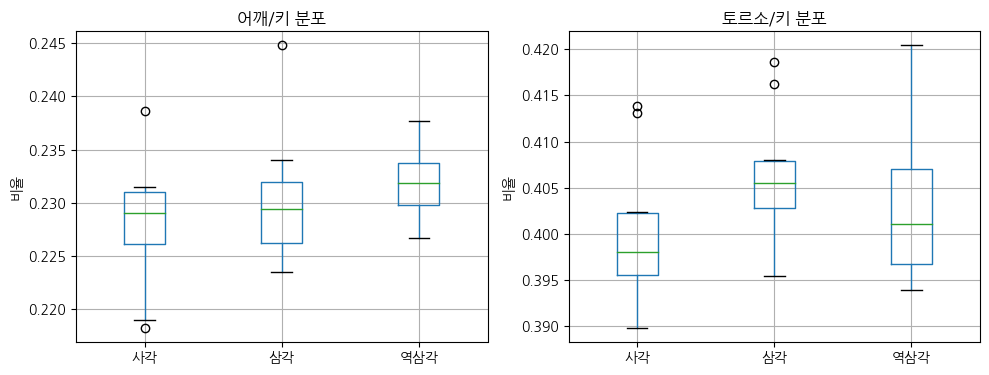

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

# Ïñ¥Íπ®/ÌÇ§
ratio_df.boxplot(column="shoulder/height", by="shape", ax=ax1)
ax1.set_title("Ïñ¥Íπ®/ÌÇ§ Î∂ÑÌè¨"); ax1.set_xlabel(""); ax1.set_ylabel("ÎπÑÏú®")

# ÌÜ†Î•¥ÏÜå/ÌÇ§
ratio_df.boxplot(column="torso/height", by="shape", ax=ax2)
ax2.set_title("ÌÜ†Î•¥ÏÜå/ÌÇ§ Î∂ÑÌè¨"); ax2.set_xlabel(""); ax2.set_ylabel("ÎπÑÏú®")

plt.suptitle("")           # Í∏∞Î≥∏ suptitle Ï†úÍ±∞
plt.tight_layout()
plt.show()


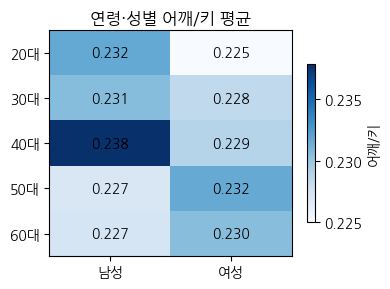

In [11]:
import numpy as np

# Ïó∞Î†π¬∑ÏÑ±Î≥Ñ Í∑∏Î£πÎ≥Ñ ÌèâÍ∑† shoulder/height
heat = ratio_df.pivot_table(index="age", columns="sex",
                            values="shoulder/height", aggfunc="mean")

fig, ax = plt.subplots(figsize=(4,3))
im = ax.imshow(heat.values, cmap="Blues", aspect="auto")

# Ï∂ï ÎùºÎ≤®
ax.set_xticks(np.arange(len(heat.columns)))
ax.set_xticklabels(heat.columns)
ax.set_yticks(np.arange(len(heat.index)))
ax.set_yticklabels(heat.index)
ax.set_title("Ïó∞Î†π¬∑ÏÑ±Î≥Ñ Ïñ¥Íπ®/ÌÇ§ ÌèâÍ∑†")

# Í∞í ÌëúÏãú
for i in range(heat.shape[0]):
    for j in range(heat.shape[1]):
        txt = f"{heat.iloc[i,j]:.3f}" if not np.isnan(heat.iloc[i,j]) else "-"
        ax.text(j, i, txt, ha="center", va="center", color="black")

plt.colorbar(im, ax=ax, shrink=0.7, label="Ïñ¥Íπ®/ÌÇ§")
plt.tight_layout()
plt.show()


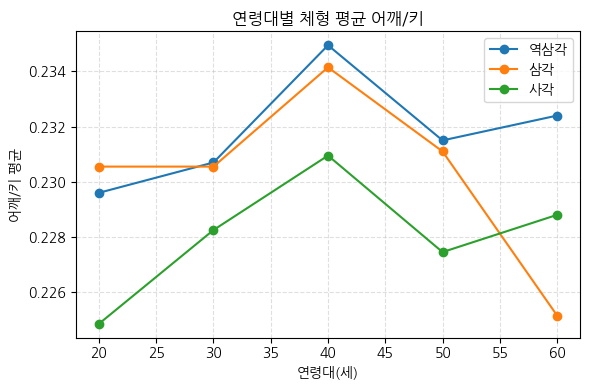

In [12]:
# age Ïª¨ÎüºÏùÄ '20ÎåÄ' Î¨∏ÏûêÏó¥Ïù¥ÎØÄÎ°ú Ïà´Ïûê Î≥ÄÌôò
ratio_df["age_num"] = ratio_df["age"].str.extract(r"(\d{2})").astype(float)

fig, ax = plt.subplots(figsize=(6,4))
for shape in SHAPE_REGEX.keys():          # Ïó≠ÏÇºÍ∞Å¬∑ÏÇºÍ∞Å¬∑ÏÇ¨Í∞Å
    sub = ratio_df[ratio_df["shape"] == shape]
    sub.groupby("age_num")["shoulder/height"].mean().plot(ax=ax, marker="o", label=shape)

ax.set_xlabel("Ïó∞Î†πÎåÄ(ÏÑ∏)")
ax.set_ylabel("Ïñ¥Íπ®/ÌÇ§ ÌèâÍ∑†")
ax.set_title("Ïó∞Î†πÎåÄÎ≥Ñ Ï≤¥Ìòï ÌèâÍ∑† Ïñ¥Íπ®/ÌÇ§")
ax.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

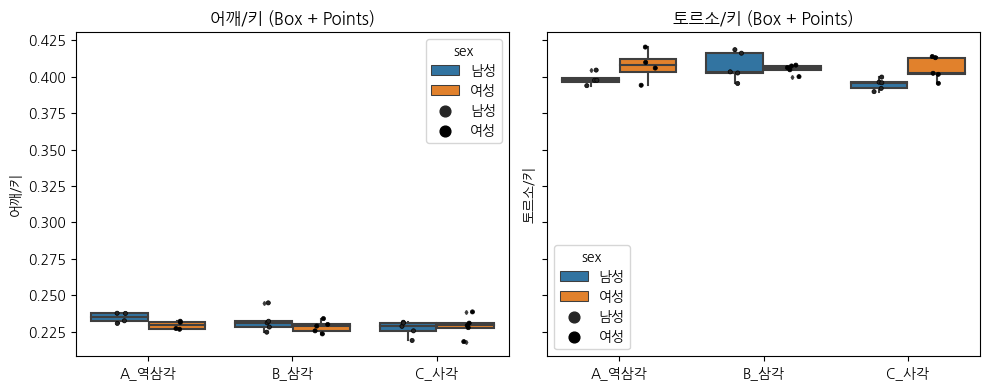

In [ ]:
# ÏÑ±Î≥ÑÏù¥ Îã¨ÎùºÎèÑ Í∞ôÏùÄ Ï≤¥ÌòïÏùÄ Í∞ôÏùÄ Î∂ÑÌè¨ÏùºÍπå,,?
# 1) Îç∞Ïù¥ÌÑ∞ Ï†ïÎ¶¨: Ï≤¥Ìòï¬∑ÏÑ±Î≥Ñ Í∑∏Î£πÌïë
plot_df = ratio_df.copy()
plot_df["shape_kor"] = plot_df["shape"].map({"Ïó≠ÏÇºÍ∞Å":"A_Ïó≠ÏÇºÍ∞Å", "ÏÇºÍ∞Å":"B_ÏÇºÍ∞Å", "ÏÇ¨Í∞Å":"C_ÏÇ¨Í∞Å"})
# ‚îÄ‚îÄ ÏïûÏóê A/B/C Î•º Î∂ôÏó¨ÏÑú violinÏù¥ ÏïåÌååÎ≤≥ ÏàúÏúºÎ°ú Ï†ïÎ†¨ÎêòÎèÑÎ°ù
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)

sns.boxplot(data=plot_df, x="shape_kor", y="shoulder/height",
            hue="sex", ax=axes[0], showcaps=False, fliersize=2)
sns.stripplot(data=plot_df, x="shape_kor", y="shoulder/height",
              hue="sex", dodge=True, ax=axes[0], color="black", size=3, linewidth=0.5)
axes[0].set_title("Ïñ¥Íπ®/ÌÇ§ (Box + Points)"); axes[0].set_xlabel(""); axes[0].set_ylabel("Ïñ¥Íπ®/ÌÇ§")

sns.boxplot(data=plot_df, x="shape_kor", y="torso/height",
            hue="sex", ax=axes[1], showcaps=False, fliersize=2)
sns.stripplot(data=plot_df, x="shape_kor", y="torso/height",
              hue="sex", dodge=True, ax=axes[1], color="black", size=3, linewidth=0.5)
axes[1].set_title("ÌÜ†Î•¥ÏÜå/ÌÇ§ (Box + Points)"); axes[1].set_xlabel(""); axes[1].set_ylabel("ÌÜ†Î•¥ÏÜå/ÌÇ§")
plt.tight_layout(); plt.show()



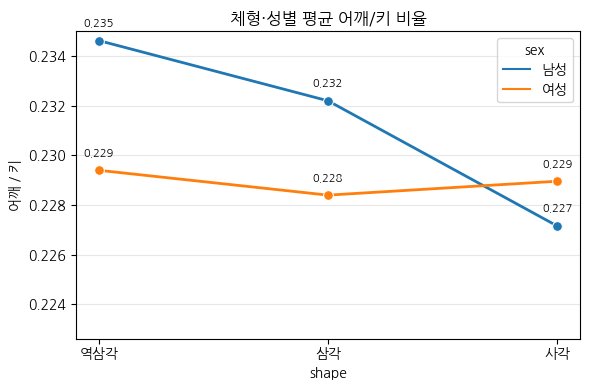

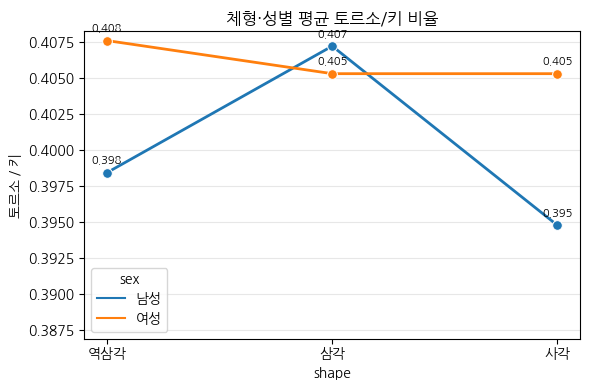

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

shape_order = ["Ïó≠ÏÇºÍ∞Å", "ÏÇºÍ∞Å", "ÏÇ¨Í∞Å"]
ratio_df["shape"] = pd.Categorical(ratio_df["shape"], categories=shape_order, ordered=True)

def lineplot_by_shape(metric: str, ylabel: str, title: str):
    avg = (ratio_df
           .groupby(["shape","sex"])[metric]
           .mean()
           .reset_index())
    
    plt.figure(figsize=(6,4))
    sns.lineplot(data=avg, x="shape", y=metric, hue="sex",
                 marker="o", markersize=7, linewidth=2)
    
    # Í∞Å Ìè¨Ïù∏Ìä∏Ïóê Í∞í ÎùºÎ≤®(ÏÑ†ÌÉù)
    for _, row in avg.iterrows():
        plt.text(row["shape"], row[metric]+0.0005, f"{row[metric]:.3f}",
                 ha="center", va="bottom", fontsize=8)
    
    plt.ylabel(ylabel); plt.title(title)
    plt.ylim(bottom=avg[metric].min()*0.98)
    plt.grid(axis="y", alpha=0.3); plt.tight_layout()
    plt.show()

lineplot_by_shape("shoulder/height", "Ïñ¥Íπ® / ÌÇ§", "Ï≤¥Ìòï¬∑ÏÑ±Î≥Ñ ÌèâÍ∑† Ïñ¥Íπ®/ÌÇ§ ÎπÑÏú®")
lineplot_by_shape("torso/height",    "ÌÜ†Î•¥ÏÜå / ÌÇ§", "Ï≤¥Ìòï¬∑ÏÑ±Î≥Ñ ÌèâÍ∑† ÌÜ†Î•¥ÏÜå/ÌÇ§ ÎπÑÏú®")


In [ ]:
from scipy import stats
import numpy as np

def effect_size_and_p(df, metric):
    men   = df[df.sex == "ÎÇ®ÏÑ±"][metric]
    women = df[df.sex == "Ïó¨ÏÑ±"][metric]
    # ÌèâÍ∑† Ï∞®Ïù¥ t-test
    t, p = stats.ttest_ind(men, women, equal_var=False)
    # Ìö®Í≥ºÎüâ Cohen‚Äôs d
    d = (men.mean() - women.mean()) / np.sqrt(((men.var(ddof=1) + women.var(ddof=1)) / 2))
    return men.mean(), women.mean(), p, d

for m in ["shoulder/height", "torso/height"]:
    m_m, w_m, p, d = effect_size_and_p(ratio_df, m)
    print(f"{m:17s}  ÎÇ®={m_m:.4f}  Ïó¨={w_m:.4f}  p={p:.4f}  d={d:.2f}")


shoulder/height    ÎÇ®=0.2311  Ïó¨=0.2289  p=0.3072  d=0.39
torso/height       ÎÇ®=0.4003  Ïó¨=0.4060  p=0.0632  d=-0.73


‚úî ÌååÏã± ÏÑ±Í≥µ: 10


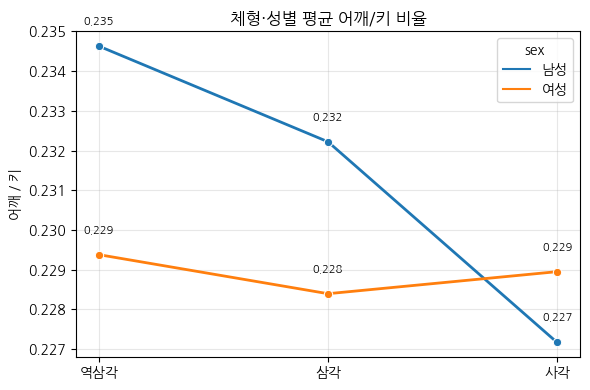

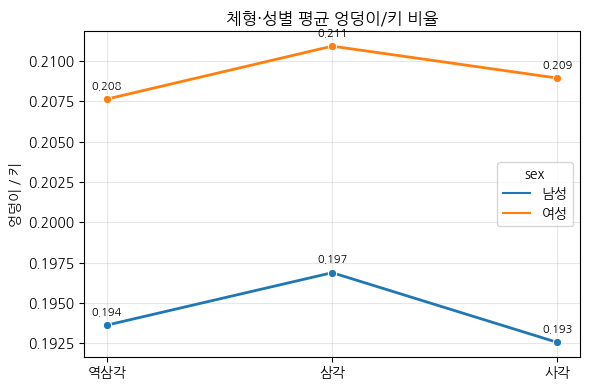

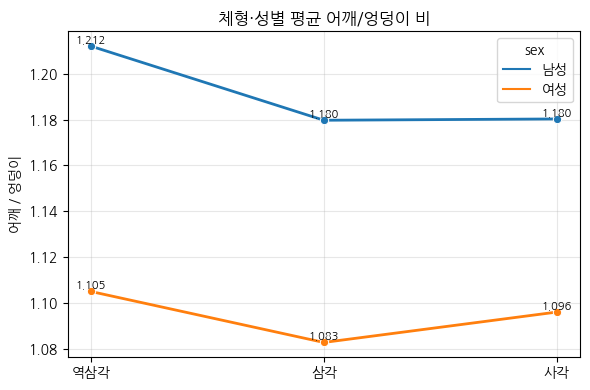

In [ ]:
import os, re, glob, numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from docx import Document
from typing import Optional, Dict, Tuple

BASE_DIR = r"C:\Users\grace\OneDrive\Desktop\dataset\body_shape" 

VAR_MAP = {
    "(102)": "height_mm",        # ÌÇ§
    "(128)": "torso_mm",         # Î™∏ÌÜµÏàòÏßÅÍ∏∏Ïù¥
    "(317)": "shoulder_mm",      # Ïñ¥Íπ®ÎÑàÎπÑ
    "(120)": "hip_width_mm",     # ÏóâÎç©Ïù¥ÎÑàÎπÑ(Í≥®Î∞òÌè≠)
    "(213)": "hip_girth_mm",     # ÏóâÎç©Ïù¥ÎëòÎ†à
    "(211)": "waist_girth_mm",   # ÌóàÎ¶¨ÎëòÎ†à
}

SHAPE_REGEX: Dict[str, str] = {
    "Ïó≠ÏÇºÍ∞Å": r"Ïó≠\s*ÏÇºÍ∞Å",
    "ÏÇºÍ∞Å"  : r"(?<!Ïó≠)\s*ÏÇºÍ∞Å",   # 'Ïó≠ÏÇºÍ∞Å' Ï†úÏô∏
    "ÏÇ¨Í∞Å"  : r"ÏÇ¨Í∞Å",
}

def parse_file_meta(fname: str) -> Tuple[str, str]:
    sex = re.search(r"(ÎÇ®ÏÑ±|ÎÇ®Ïûê|Ïó¨ÏÑ±|Ïó¨Ïûê)", fname)
    age = re.search(r"(\d{2}ÎåÄ)", fname)
    return (sex.group(1) if sex else "Unknown",
            age.group(1) if age else "Unknown")

def parse_docx_table(path: str) -> Optional[pd.DataFrame]:
    doc = Document(path)
    if not doc.tables:
        return None
    tbl = doc.tables[0]
    rows = [[c.text.strip() for c in r.cells] for r in tbl.rows]
    if len(rows) < 2:
        return None

    header = rows[0]
    col_idx: Dict[str, int] = {}
    for shape, rgx in SHAPE_REGEX.items():
        for idx, h in enumerate(header):
            if re.search(rgx, h):
                col_idx[shape] = idx
                break
    if not col_idx:            
        return None

    records = []
    for row in rows[1:]:
        m = re.match(r"^\(\d{3}\)", row[0])
        if not m:
            continue
        var = VAR_MAP.get(m.group(0))
        if not var:
            continue

        vals = []
        for shape in col_idx:
            raw = row[col_idx[shape]].replace(",", "")
            try:
                vals.append(float(raw))
            except ValueError:
                vals.append(np.nan)
        records.append([var] + vals)

    if not records:
        return None

    df = pd.DataFrame(records,
                      columns=["var"] + list(col_idx.keys())
                     ).set_index("var")
    return df

dset: Dict[str, pd.DataFrame] = {}
for fp in glob.glob(os.path.join(BASE_DIR, "*.docx")):
    df = parse_docx_table(fp)
    if df is not None:
        dset[os.path.basename(fp)] = df
    else:
        print("[Í≤ΩÍ≥†] ÌååÏã± Ïã§Ìå® ‚Üí", os.path.basename(fp))
print("‚úî ÌååÏã± ÏÑ±Í≥µ:", len(dset))

abs_records = []
for fname, df in dset.items():
    sex, age = parse_file_meta(fname)
    for shape in df.columns:                 # Ï°¥Ïû¨ÌïòÎäî Ï≤¥ÌòïÎßå
        rec = {"src": fname, "sex": sex, "age": age, "shape": shape}
        for var in VAR_MAP.values():
            if var in df.index:
                rec[var] = df.at[var, shape]
        abs_records.append(rec)

abs_df = pd.DataFrame(abs_records)

ratio_df = abs_df.copy()
ratio_df["shoulder/height"] = ratio_df["shoulder_mm"]   / ratio_df["height_mm"]
ratio_df["torso/height"]    = ratio_df["torso_mm"]      / ratio_df["height_mm"]
ratio_df["hip/height"]      = ratio_df["hip_width_mm"]  / ratio_df["height_mm"]
ratio_df["shoulder/hip"]    = ratio_df["shoulder_mm"]   / ratio_df["hip_width_mm"]
ratio_df["waist/hip"]       = ratio_df["waist_girth_mm"] / ratio_df["hip_girth_mm"]

shape_order = ["Ïó≠ÏÇºÍ∞Å", "ÏÇºÍ∞Å", "ÏÇ¨Í∞Å"]
ratio_df["shape"] = pd.Categorical(ratio_df["shape"], categories=shape_order, ordered=True)

def line_plot(metric, title, ylabel):
    avg = (ratio_df.groupby(["shape","sex"])[metric]
                   .mean().reset_index())
    plt.figure(figsize=(6,4))
    sns.lineplot(data=avg, x="shape", y=metric, hue="sex",
                 marker="o", linewidth=2)
    for _, row in avg.iterrows():
        plt.text(row["shape"], row[metric]+0.0005, f"{row[metric]:.3f}",
                 ha="center", va="bottom", fontsize=8)
    plt.title(title); plt.ylabel(ylabel); plt.xlabel("")
    plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

line_plot("shoulder/height", "Ï≤¥Ìòï¬∑ÏÑ±Î≥Ñ ÌèâÍ∑† Ïñ¥Íπ®/ÌÇ§ ÎπÑÏú®",    "Ïñ¥Íπ® / ÌÇ§")
line_plot("hip/height",      "Ï≤¥Ìòï¬∑ÏÑ±Î≥Ñ ÌèâÍ∑† ÏóâÎç©Ïù¥/ÌÇ§ ÎπÑÏú®",  "ÏóâÎç©Ïù¥ / ÌÇ§")
line_plot("shoulder/hip",    "Ï≤¥Ìòï¬∑ÏÑ±Î≥Ñ ÌèâÍ∑† Ïñ¥Íπ®/ÏóâÎç©Ïù¥ ÎπÑ", "Ïñ¥Íπ® / ÏóâÎç©Ïù¥")


In [ ]:
import os, re, glob, pandas as pd, numpy as np
from docx import Document
from typing import Optional, Dict, List, Tuple

BASE_DIR = r"C:\Users\grace\OneDrive\Desktop\dataset\body_shape"

VAR_MAP = {
    "(102)": "height",
    "(128)": "torso_len",
    "(317)": "shoulder",
    "(120)": "hip_width", 
}

SHAPE_REGEX: Dict[str, str] = {
    "Ïó≠ÏÇºÍ∞Å": r"Ïó≠\s*ÏÇºÍ∞Å",
    "ÏÇºÍ∞Å"  : r"(?<!Ïó≠)\s*ÏÇºÍ∞Å",
    "ÏÇ¨Í∞Å"  : r"ÏÇ¨Í∞Å",
}

def parse_file_meta(fname:str)->Tuple[str,str]:
    sex = re.search(r"(ÎÇ®ÏÑ±|ÎÇ®Ïûê|Ïó¨ÏÑ±|Ïó¨Ïûê)",fname)
    age = re.search(r"(\d{2}ÎåÄ)",fname)
    return sex.group(1) if sex else "Unknown", age.group(1) if age else "Unknown"

def parse_docx_table(path:str)->Optional[pd.DataFrame]:
    doc = Document(path)
    if not doc.tables: return None
    rows = [[c.text.strip() for c in r.cells] for r in doc.tables[0].rows]
    if len(rows)<2: return None

    header = rows[0]
    col_idx = {}                              
    for shape,rgx in SHAPE_REGEX.items():
        for i,h in enumerate(header):
            if re.search(rgx,h):
                col_idx[shape]=i ; break
    if not col_idx: return None                  

    recs = []                                  
    for row in rows[1:]:
        m = re.match(r"^\(\d{3}\)",row[0])
        if not m: continue
        var_key = VAR_MAP.get(m.group(0))
        if not var_key: continue
        vals=[]
        for shape in col_idx:
            raw = row[col_idx[shape]].replace(",","")
            try: vals.append(float(raw))
            except ValueError: vals.append(np.nan)
        recs.append([var_key]+vals)

    if not recs: return None
    df = pd.DataFrame(recs, columns=["var"]+list(col_idx.keys())).set_index("var")
    return df                                     

data_dict:Dict[str,pd.DataFrame]={}
for fp in glob.glob(os.path.join(BASE_DIR,"*.docx")):
    df=parse_docx_table(fp)
    if df is not None: data_dict[os.path.basename(fp)]=df
    else: print("[Í≤ΩÍ≥†] ÌååÏã± Ïã§Ìå® ‚Üí",os.path.basename(fp))
print("‚úî ÌååÏã± ÏÑ±Í≥µ:",len(data_dict))

records:List[Dict[str,object]]=[]
need_vars=["height","shoulder","torso_len"] 

for fname,df in data_dict.items():
    sex,age=parse_file_meta(fname)
    if any(v not in df.index for v in need_vars): 
        print("[Ï£ºÏùò]",fname,"‚Üí height/shoulder/torso Îπ†Ïßê"); continue
    for shape in df.columns:                     
        h,s,t = df.at["height",shape], df.at["shoulder",shape], df.at["torso_len",shape]
        hip   = df.at["hip_width",shape] if "hip_width" in df.index else np.nan
        if np.isnan(h) or np.isnan(s) or np.isnan(t): continue
        rec={"src":fname,"sex":sex,"age":age,"shape":shape,
             "shoulder/height":round(s/h,6),
             "torso/height"   :round(t/h,6)}
        if not np.isnan(hip): rec["hip/height"]=round(hip/h,6)
        records.append(rec)

ratio_df=pd.DataFrame(records)
print("ÎØ∏Î¶¨Î≥¥Í∏∞:"); display(ratio_df.head())

pivot=ratio_df.pivot_table(index="shape",
                           values=["shoulder/height","torso/height","hip/height"],
                           aggfunc="mean")
print("Ï≤¥ÌòïÎ≥Ñ ÌèâÍ∑† ÎπÑÏú®:"); display(pivot)


‚úî ÌååÏã± ÏÑ±Í≥µ: 10

ÎØ∏Î¶¨Î≥¥Í∏∞:


src sex  age shape  shoulder/height  torso/height  hip/height
0  ÎÇ®ÏÑ±_20ÎåÄ_ÏπòÏàò.docx  ÎÇ®ÏÑ±  20ÎåÄ   Ïó≠ÏÇºÍ∞Å         0.232504      0.393869    0.190283
1  ÎÇ®ÏÑ±_20ÎåÄ_ÏπòÏàò.docx  ÎÇ®ÏÑ±  20ÎåÄ    ÏÇºÍ∞Å         0.231124      0.395389    0.190778
2  ÎÇ®ÏÑ±_20ÎåÄ_ÏπòÏàò.docx  ÎÇ®ÏÑ±  20ÎåÄ    ÏÇ¨Í∞Å         0.231524      0.392032    0.189954
3  ÎÇ®ÏÑ±_30ÎåÄ_ÏπòÏàò.docx  ÎÇ®ÏÑ±  30ÎåÄ   Ïó≠ÏÇºÍ∞Å         0.230725      0.397583    0.189873
4  ÎÇ®ÏÑ±_30ÎåÄ_ÏπòÏàò.docx  ÎÇ®ÏÑ±  30ÎåÄ    ÏÇºÍ∞Å         0.232247      0.403376    0.197905


Ï≤¥ÌòïÎ≥Ñ ÌèâÍ∑† ÎπÑÏú®:


hip/height  shoulder/height  torso/height
shape                                           
ÏÇ¨Í∞Å       0.200744         0.228059      0.400038
ÏÇºÍ∞Å       0.203901         0.230308      0.406285
Ïó≠ÏÇºÍ∞Å      0.200630         0.232003      0.403007

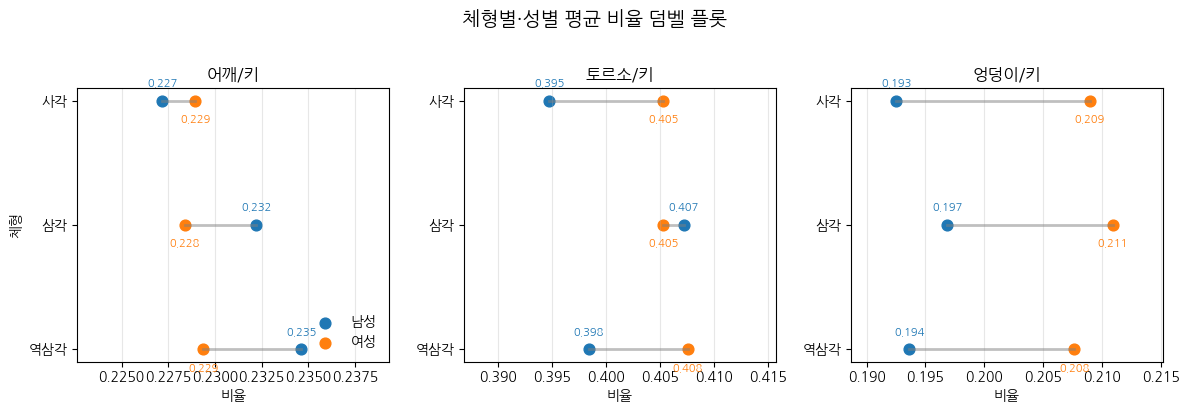

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ‚îÄ‚îÄ 1) Ï≤¥Ìòï ÏàúÏÑú Í≥†Ï†ï
shape_order = ["Ïó≠ÏÇºÍ∞Å", "ÏÇºÍ∞Å", "ÏÇ¨Í∞Å"]
ratio_df["shape"] = pd.Categorical(ratio_df["shape"],
                                   categories=shape_order, ordered=True)

metrics = {
    "shoulder/height": "Ïñ¥Íπ®/ÌÇ§",
    "torso/height"   : "ÌÜ†Î•¥ÏÜå/ÌÇ§",
    "hip/height"     : "ÏóâÎç©Ïù¥/ÌÇ§"
}

avg = (ratio_df
       .groupby(["shape","sex"])
       [list(metrics)].mean()
       .reset_index())

fig, axes = plt.subplots(1, 3, figsize=(12,4), sharey=False)

for ax, (metric, label) in zip(axes, metrics.items()):
    sub = avg.pivot(index="shape", columns="sex", values=metric).loc[shape_order]
    
    ax.scatter(sub["ÎÇ®ÏÑ±"], sub.index, color="#1f77b4", s=60, label="ÎÇ®ÏÑ±" if metric=="shoulder/height" else "")
    ax.scatter(sub["Ïó¨ÏÑ±"], sub.index, color="#ff7f0e", s=60, label="Ïó¨ÏÑ±" if metric=="shoulder/height" else "")
    
    for y, (m_val, w_val) in enumerate(zip(sub["ÎÇ®ÏÑ±"], sub["Ïó¨ÏÑ±"])):
        ax.plot([m_val, w_val], [y, y], color="gray", lw=2, alpha=0.5)
        ax.text(m_val, y+0.1, f"{m_val:.3f}", ha="center", va="bottom", fontsize=8, color="#1f77b4")
        ax.text(w_val, y-0.1, f"{w_val:.3f}", ha="center", va="top",    fontsize=8, color="#ff7f0e")
    
    ax.set_title(label)
    ax.set_xlabel("ÎπÑÏú®")
    ax.set_xlim(sub.values.min()*0.98, sub.values.max()*1.02)
    ax.grid(axis="x", alpha=0.3)
    if metric=="shoulder/height":
        ax.set_ylabel("Ï≤¥Ìòï")
    else:
        ax.set_ylabel("")

axes[0].legend(loc="lower right", frameon=False)
plt.suptitle("Ï≤¥ÌòïÎ≥Ñ¬∑ÏÑ±Î≥Ñ ÌèâÍ∑† ÎπÑÏú® Îç§Î≤® ÌîåÎ°Ø", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


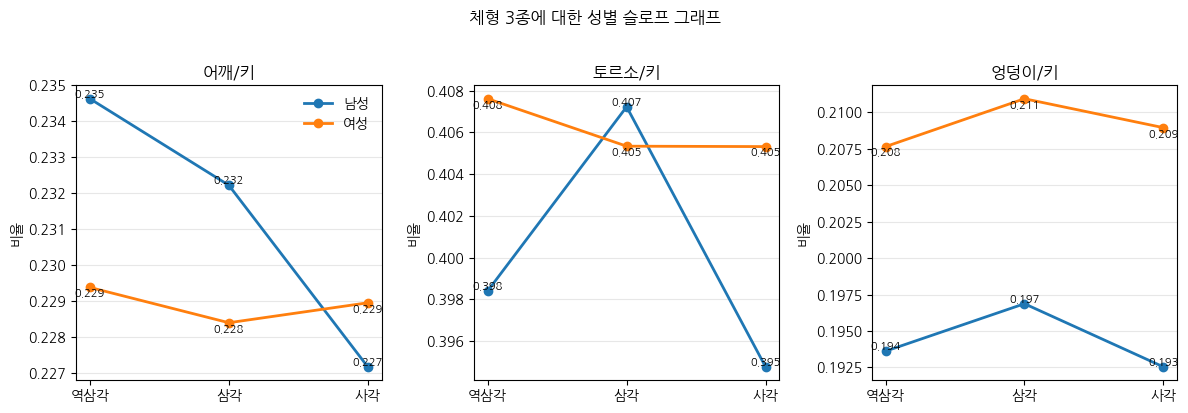

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# Ï≤¥Ìòï ÏàúÏÑú Í≥†Ï†ï
shape_order = ["Ïó≠ÏÇºÍ∞Å", "ÏÇºÍ∞Å", "ÏÇ¨Í∞Å"]
ratio_df["shape"] = pd.Categorical(ratio_df["shape"], categories=shape_order, ordered=True)

metrics = {
    "shoulder/height": "Ïñ¥Íπ®/ÌÇ§",
    "torso/height"   : "ÌÜ†Î•¥ÏÜå/ÌÇ§",
    "hip/height"     : "ÏóâÎç©Ïù¥/ÌÇ§"
}

# Ï≤¥Ìòï¬∑ÏÑ±Î≥Ñ ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
avg = (ratio_df
       .groupby(["sex", "shape"])[list(metrics)]
       .mean()
       .reset_index())

# Ïä¨Î°úÌîÑ Í∑∏ÎûòÌîÑ Ìï®Ïàò
def slope(metric, ax):
    sub = avg.pivot(index="sex", columns="shape", values=metric).loc[["ÎÇ®ÏÑ±","Ïó¨ÏÑ±"]]
    for sex, row in sub.iterrows():
        ax.plot(shape_order, row[shape_order], marker="o", label=sex,
                linewidth=2, markersize=6)
        # Ìè¨Ïù∏Ìä∏ ÎùºÎ≤®
        for x, y in zip(shape_order, row[shape_order]):
            ax.text(x, y, f"{y:.3f}", ha="center", va="bottom" if sex=="ÎÇ®ÏÑ±" else "top", fontsize=8)
    ax.set_ylabel("ÎπÑÏú®"); ax.set_xlabel("")
    ax.set_title(metrics[metric])
    ax.grid(axis="y", alpha=0.3)

fig, axes = plt.subplots(1, 3, figsize=(12,4), sharey=False)
for ax, m in zip(axes, metrics):
    slope(m, ax)
axes[0].legend(frameon=False)
plt.suptitle("Ï≤¥Ìòï 3Ï¢ÖÏóê ÎåÄÌïú ÏÑ±Î≥Ñ Ïä¨Î°úÌîÑ Í∑∏ÎûòÌîÑ", y=1.02)
plt.tight_layout(); plt.show()


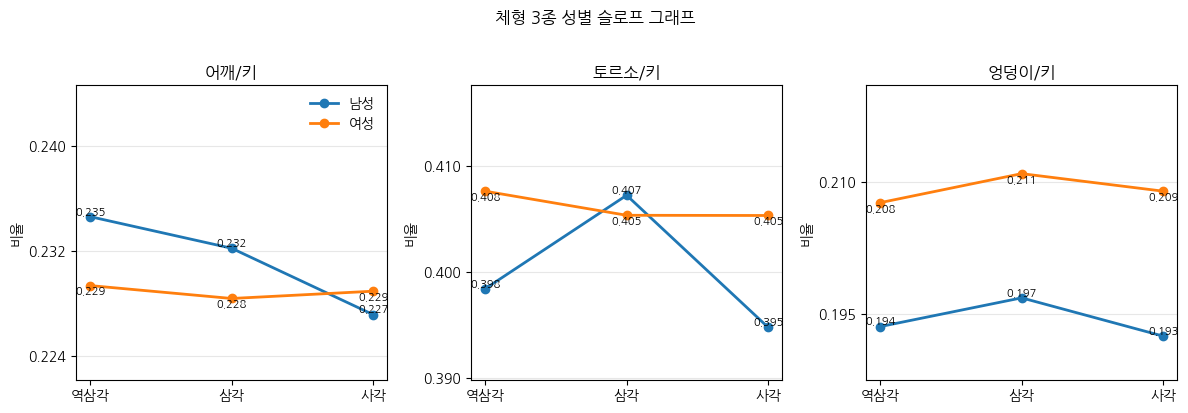


‚òÖ ÎÇ®‚ÄìÏó¨ Ï∞®Ïù¥ Ìëú (ÎπÑÏú® & 170 cm Í∏∞Ï§Ä cm)


sex           Œî(ÎπÑÏú®)  Œî(cm)@170
      shape                   
Ïñ¥Íπ®/ÌÇ§  Ïó≠ÏÇºÍ∞Å    0.0052        0.9
      ÏÇºÍ∞Å     0.0038        0.6
      ÏÇ¨Í∞Å    -0.0018       -0.3
ÌÜ†Î•¥ÏÜå/ÌÇ§ Ïó≠ÏÇºÍ∞Å   -0.0092       -1.6
      ÏÇºÍ∞Å     0.0019        0.3
      ÏÇ¨Í∞Å    -0.0106       -1.8
ÏóâÎç©Ïù¥/ÌÇ§ Ïó≠ÏÇºÍ∞Å   -0.0140       -2.4
      ÏÇºÍ∞Å    -0.0141       -2.4
      ÏÇ¨Í∞Å    -0.0164       -2.8

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from matplotlib.ticker import FormatStrFormatter, MaxNLocator

shape_order = ["Ïó≠ÏÇºÍ∞Å", "ÏÇºÍ∞Å", "ÏÇ¨Í∞Å"]
ratio_df["shape"] = pd.Categorical(ratio_df["shape"], categories=shape_order, ordered=True)

metrics = {
    "shoulder/height": "Ïñ¥Íπ®/ÌÇ§",
    "torso/height"   : "ÌÜ†Î•¥ÏÜå/ÌÇ§",
    "hip/height"     : "ÏóâÎç©Ïù¥/ÌÇ§"
}

avg = (ratio_df
       .groupby(["sex", "shape"])[list(metrics)]
       .mean()
       .reset_index())

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for ax, (metric, label) in zip(axes, metrics.items()):
    sub = avg.pivot(index="sex", columns="shape", values=metric).loc[["ÎÇ®ÏÑ±", "Ïó¨ÏÑ±"]]
    for sex, row in sub.iterrows():
        ax.plot(shape_order, row[shape_order], marker="o",
                linewidth=2, label=sex if metric=="shoulder/height" else "")
        for x, y in zip(shape_order, row[shape_order]):
            ax.text(x, y, f"{y:.3f}", ha="center",
                    va="bottom" if sex=="ÎÇ®ÏÑ±" else "top", fontsize=8)
    
    y_min, y_max = sub.values.min(), sub.values.max()    
    ax.set_ylim(y_min - 0.005, y_max + 0.01)              
    ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    
    
    ax.set_title(label); ax.set_ylabel("ÎπÑÏú®"); ax.set_xlabel("")
    ax.grid(axis="y", alpha=0.3)

axes[0].legend(frameon=False, loc="best")
plt.suptitle("Ï≤¥Ìòï 3Ï¢Ö ÏÑ±Î≥Ñ Ïä¨Î°úÌîÑ Í∑∏ÎûòÌîÑ", y=1.02)
plt.tight_layout(); plt.show()

diff_rows = []
for metric, label in metrics.items():
    sub = avg.pivot(index="shape", columns="sex", values=metric).loc[shape_order]
    # Œî = ÎÇ® ‚Äì Ïó¨ (ÏñëÏàòÎ©¥ ÎÇ® > Ïó¨)
    sub["Œî(ÎπÑÏú®)"] = (sub["ÎÇ®ÏÑ±"] - sub["Ïó¨ÏÑ±"]).round(4)

diff_table = pd.concat(diff_rows, keys=metrics.values())
print("ÎÇ®‚ÄìÏó¨ Ï∞®Ïù¥ Ìëú (ÎπÑÏú® & 170 cm Í∏∞Ï§Ä cm)")
display(diff_table)


In [ ]:
import os, re, glob, numpy as np, pandas as pd
from docx import Document
from typing import Optional, Dict

BASE_DIR = r"C:\Users\grace\OneDrive\Desktop\dataset\body_shape" 

def canon_shape(txt: str) -> Optional[str]:
    t = txt.replace(" ", "")
    if "Ïó≠ÏÇºÍ∞Å" in t: return "inverted_triangle"
    if "ÏÇºÍ∞Å" in t and "Ïó≠" not in t: return "triangle"
    if "ÏÇ¨Í∞Å" in t: return "rectangle"
    return None

VAR_MAP = {"(102)": "height_mm",
           "(317)": "shoulder_mm",
           "(128)": "torso_mm",
           "(120)": "hip_mm"}

def parse_docx(path: str) -> Optional[pd.DataFrame]:
    doc = Document(path)
    if not doc.tables: return None
    rows = [[c.text.strip() for c in r.cells] for r in doc.tables[0].rows]

    header = rows[0]
    col_idx: Dict[str, int] = {}
    for i, h in enumerate(header):
        shp = canon_shape(h)
        if shp: col_idx[shp] = i
    if not col_idx: return None

    records = []
    for r in rows[1:]:
        m = re.match(r"^\(\d{3}\)", r[0])  
        if not m or m.group(0) not in VAR_MAP: 
            continue
        var = VAR_MAP[m.group(0)]
        rec = {"variable": var}
        for shp, idx in col_idx.items():
            try:
                rec[shp] = float(r[idx].replace(",", ""))
            except ValueError:
                rec[shp] = np.nan
        records.append(rec)

    if not records: return None
    df = pd.DataFrame(records).set_index("variable")
    return df

dfs = []
for fp in glob.glob(os.path.join(BASE_DIR, "*.docx")):
    df = parse_docx(fp)
    if df is not None:
        dfs.append(df)
    else:
        print("[Í≤ΩÍ≥†] ÌååÏã± Ïã§Ìå® ‚Üí", os.path.basename(fp))

if not dfs:
    raise RuntimeError("DOCXÏóêÏÑú Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏßÄ Î™ªÌï®.")

full = pd.concat(dfs, keys=range(len(dfs)))

abs_mean = full.groupby(level=1).mean().round(1).T 
print("Ï†àÎåÄÍ∞í ÌèâÍ∑† (mm)", abs_mean)

ratio_tbl = pd.DataFrame(index=abs_mean.index)
ratio_tbl["shoulder/height"] = abs_mean["shoulder_mm"] / abs_mean["height_mm"]
ratio_tbl["torso/height"]    = abs_mean["torso_mm"]    / abs_mean["height_mm"]
ratio_tbl["hip/height"]      = abs_mean["hip_mm"]      / abs_mean["height_mm"]
ratio_tbl["shoulder/hip"]    = abs_mean["shoulder_mm"] / abs_mean["hip_mm"]
ratio_tbl = ratio_tbl.round(3)

print("Ï≤¥ÌòïÎ≥Ñ ÌèâÍ∑† ÎπÑÏú®", ratio_tbl)



üìè Ï†àÎåÄÍ∞í ÌèâÍ∑† (mm)
 variable           height_mm  hip_mm  shoulder_mm  torso_mm
inverted_triangle     1626.5   328.2        380.0     658.5
triangle              1616.1   329.0        372.3     656.5
rectangle             1624.3   326.8        370.0     653.7

üìä Ï≤¥ÌòïÎ≥Ñ ÌèâÍ∑† ÎπÑÏú®
                    shoulder/height  torso/height  hip/height  shoulder/hip
inverted_triangle            0.234         0.405       0.202         1.158
triangle                     0.230         0.406       0.204         1.132
rectangle                    0.228         0.402       0.201         1.132
